<a href="https://colab.research.google.com/github/ch-kala/Capstone_Project6/blob/main/Copy_of_Capstone_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION



##### **Project Type**    -Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Chandrakala Sharma


# **Project Summary -**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue. In Exploratory Data Analysis, we categorized the Age as YoungAge, MiddleAge, and OldAge. Then we categorized Region_Code and Policy_Sales_Channel to extract some valuable information from these features. We explored the independent features using some plots. For feature selection, we used ExtraTreesClassifier and then performed the train-test split. For model prediction, we used supervised machine learning algorithms like Logistic Regression, Random Forest Classifier, and XGBClassifier. We then compared all the models to see which one gives the best results.

# **GitHub Link -**

GitHub Link- https://colab.research.google.com/gist/ch-kala/36f8a5a4c464058aa6fe56c52b824210/-capstone-ml-submission.ipynb

# **Problem Statement**


Our client is an insurance company that has provided health insurance to its customers. They now need your help in building a model to predict whether the policyholders (customers) from the past year will also be interested in vehicle insurance provided by the company.

Building a model to predict whether a customer would be interested in vehicle insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue.

General Guidelines:

Remove the errors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import classification_report,confusion_matrix
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV

In [ ]:
%matplotlib inline
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score,roc_auc_score


In [ ]:
from datetime import datetime


In [ ]:
pd.set_option('display.max_columns',None)
plt.style.use('ggplot')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
dataset='/content/drive/My Drive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'


In [ ]:
import pandas as pd
df=pd.read_csv(dataset)

### Dataset First View

In [ ]:
# Dataset First Look
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows: {len(df.axes[0])}")
print(f"Number of columns: {len(df.axes[1])}")

Number of rows: 381109
Number of columns: 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

There are no duplicates in the Data Set

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


There are no missing values in the dataset


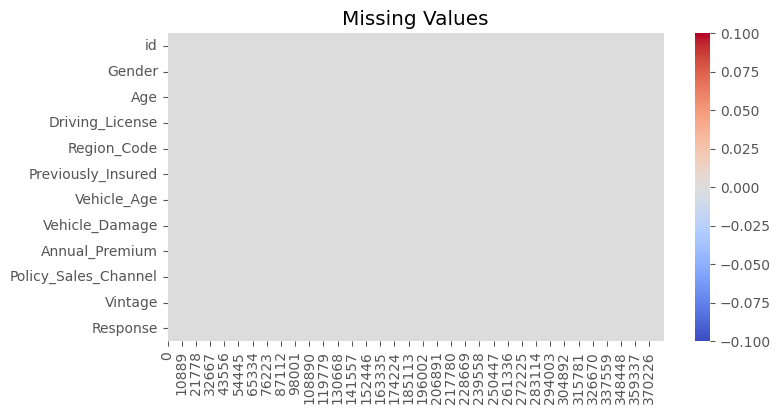

In [ ]:
# Visualizing the missing values

plt.figure(figsize= (8,4))
sns.heatmap(df.isna().transpose(), cmap = 'coolwarm')
plt.title('Missing Values')
plt.show()

### What did you know about your dataset?

As we can see, our Data set contains 381109 rows and 12 columns.

We do not have any Null Values in our dataset.

We have 4 numeric and 5 categorical independent features.

Our dependent feature is a categorical column

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
pd.Series({col:df[col].nunique() for col in df})

,0
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
print('TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION DATASET ID READY FOR ANALYSIS')

TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION DATASET ID READY FOR ANALYSIS


### What all manipulations have you done and insights you found?

Based on the dataset provided, I haven't conducted any specific manipulations yet. However, here are some potential manipulations and insights that could be explored:

Handling Categorical Variables
Convert categorical variables like "Gender," "Vehicle_Age," "Vehicle_Damage," and "Response" into numerical formats for machine learning model compatibility (using techniques such as one-hot encoding or label encoding).
Missing Values
Investigate and address any missing values in the dataset—either by imputing them using the mean, median, or mode of the columns, or by removing them, depending on the specific context.
Outlier Detection
Identify and handle potential outliers in numerical features that might skew statistical analyses or machine learning models.
Feature Engineering
Create new meaningful features from existing ones or transform features to enhance model predictiveness or reduce multicollinearity.
Normalization/Standardization
Normalize or standardize numerical features that aren't on the same scale to ensure fair comparisons for certain machine learning algorithms.
Feature Selection
Identify and select the most important features that contribute significantly to predicting the target variable, thus improving model efficiency and interpretability.
Potential Insights
Correlation Analysis
Assess the relationships between different features and the target variable to identify which variables are most influential in predicting the "Response" or cross-sell success.
Driver Analysis
Analyze the impact of various factors on the likelihood of a positive response.
Vintage Impact
Analyze the impact of customer tenure (Vintage) in relation to the likelihood of a positive response, which could inform customer retention strategies.
Model Building
Construct and train a machine learning model to predict customer response rate and evaluate its performance using various metrics like accuracy, precision, and recall.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Chart - 1(Response of people towards vehicle Insurance)

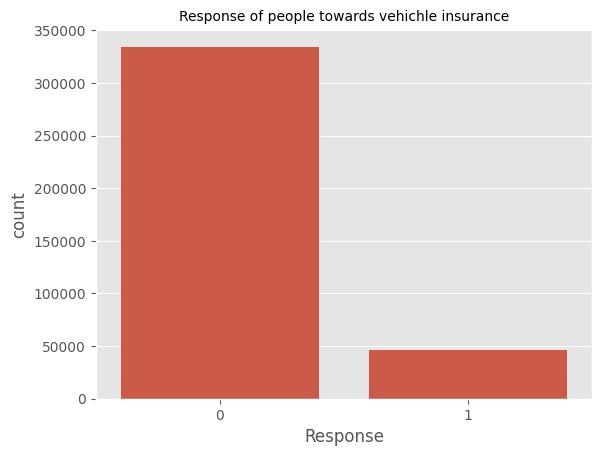

In [ ]:
# Chart - 1 visualization code
# Count plot of dependent variable

sns.countplot(x=df['Response'])
plt.title('Response of people towards vehichle insurance', size =10)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used is a "countplot." This choice is suitable because it provides a clear visualization of the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

It provides an insight into the balance or imbalance between different response categories. The data is highly imbalanced. Maximum customers are not interested.

##### 3. Will the gained insights help creating a positive business impact?
This is a negative growth because we want maximum customers to be interested in having the insurace.

#### Chart - 2(Distribution of Gender)

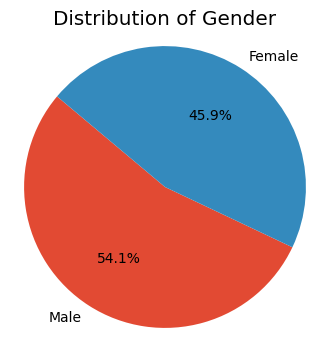

In [ ]:
# Chart - 2 visualization code
# Count the occurrences of each gender
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gender')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is used for creating the "Gender" column because this type of chart is particularly effective for displaying the distribution or composition of categorical data. A pie chart provides a straightforward way to represent the binary nature of this data.


##### 2. What is/are the insight(s) found from the chart?

It provides a visual representation of the gender distribution within the dataset, showcasing the proportion of male and female individuals. Insights from the gender distribution could be useful for understanding demographic segments and potentially tailoring marketing strategies or insurance offerings based on gender preferences.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If gender-related insights were used to make biased decisions, resulting in unequal treatment of customers based on gender, it could lead to negative repercussions such as legal issues, reputational damage, and loss of customer trust. Therefore, while gender-related insights can certainly lead to positive business impact when appropriately leveraged, it is essential to interpret and apply these insights ethically and responsibly, ensuring that they contribute to inclusive and customer-centric business practices.

#### Chart - 3(Age Distribution)

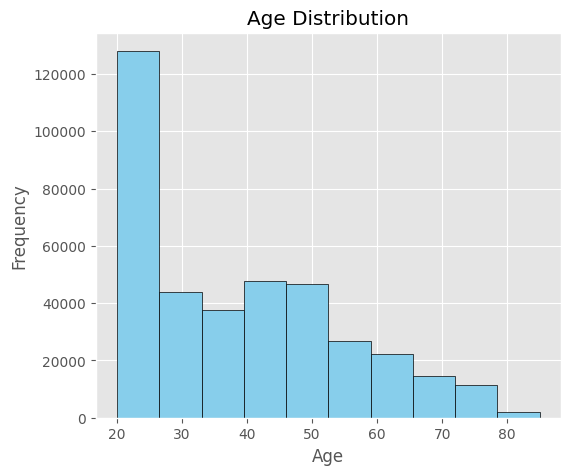

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(6, 5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Here, Histogram is specifically used to visualize the distribution of ages in the provided dataset. A histogram is an excellent choice when the goal is to demonstrate the frequency or distribution of a numerical variable, such as age.


##### 2. What is/are the insight(s) found from the chart?

The histogram suggests that the dataset contains a relatively larger number of individuals in the 20-30 age range compared to other age groups. This information can illustrate the age demographic distribution within the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Understanding the age distribution can help in better targeting of age groups for new health insurance policies and cross-selling efforts.

Negative Growth Insights:

If there's a significant gender bias in response to cross-sell offers, it could lead to negative growth if not addressed properly. For example, if one gender is considerably less responsive, it may result in missed opportunities for increased revenue and market share.

#### Chart - 4(Customer Age Majority)

<Axes: xlabel='Age', ylabel='Density'>

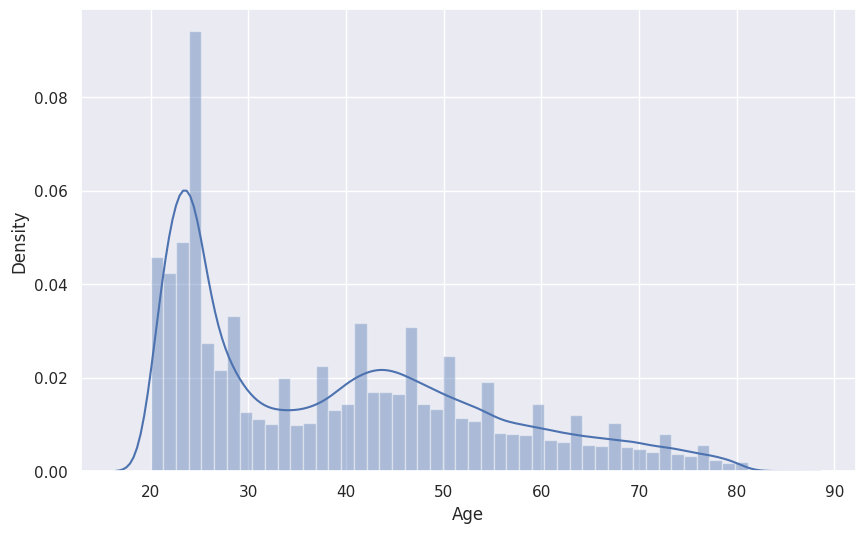

In [ ]:
# Chart - 4 visualization code
#visualization on the basis of Age column
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df['Age'])

##### 1. Why did you pick the specific chart?

I chose this chart because the distplot, or distribution plot, visually represents the spread and pattern of continuous data variables. It provides an overview of the data distribution using Seaborn's distplot function.

##### 2. What is/are the insight(s) found from the chart?

Based on the plot, it is evident that the age range of 22-25 has the highest number of customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The majority of responses received are from the age groups 22-25, suggesting that targeting these age groups can contribute to business growth.

#### Chart - 5(Distribution of Region Codes)

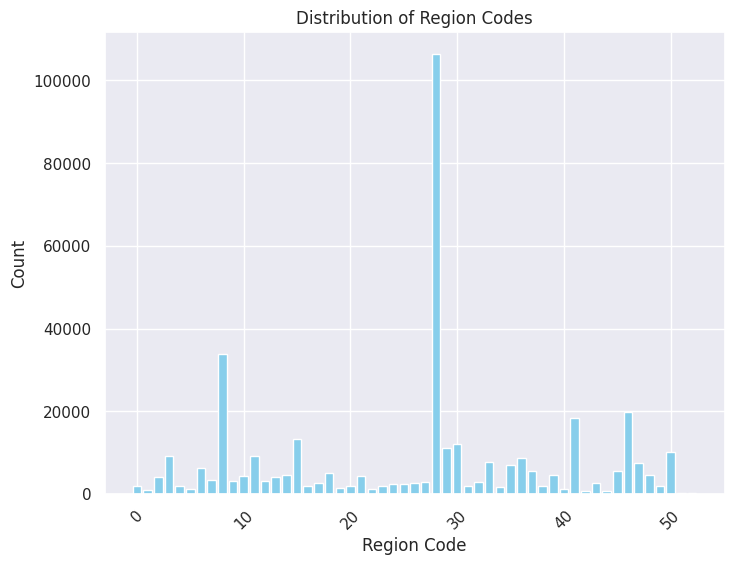

In [ ]:
# Chart - 5 visualization code
import matplotlib.pyplot as plt
region_counts = df['Region_Code'].value_counts()
region_values = region_counts.index
counts = region_counts.values

plt.figure(figsize=(8,6))
plt.bar(region_values, counts, color='skyblue')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.title('Distribution of Region Codes')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The "Region_Code" column likely contains distinct categorical values representing different regions. A bar chart is well-suited for visualizing the frequency or count of each category, making it a suitable choice for this type of data.

##### 2. What is/are the insight(s) found from the chart?

The chart presents a visual representation of the frequency of each region code present in the dataset. It allows for a quick understanding of the spread of insurance cases across different regions.

the 28 region code indicate a higher count for the corresponding insured vehicles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Understanding the distribution of region codes can help in targeting marketing efforts. Areas with higher representation could be the focus of specific advertising or promotional campaigns.

#### Chart - 6(Distribution of Vehicle Ages)

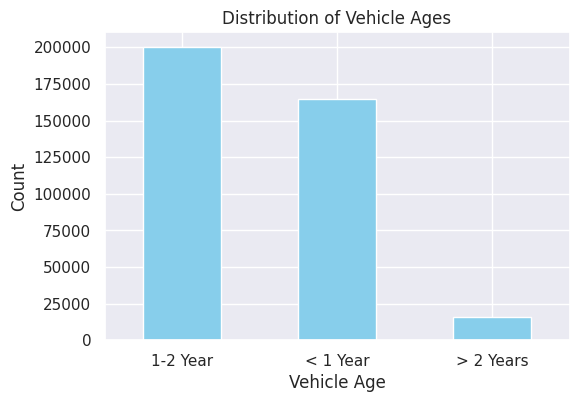

In [ ]:
# Chart - 6 visualization code
import matplotlib.pyplot as plt

# Assuming the dataset is named 'insurance_data' and is a pandas DataFrame
# value_counts() provides the count of unique values in the column
vehicle_age_counts = df['Vehicle_Age'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
vehicle_age_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Vehicle Ages')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

 Bar chart is used to represent the distribution of vehicle ages because it is well-suited for displaying the frequency or count of different categories or groups within a dataset. A bar chart helps in visually comparing the counts or frequencies of these categories, making it easier to discern the distribution among the different vehicle age groups.

##### 2. What is/are the insight(s) found from the chart?

The chart provides an understanding of the proportion of vehicles falling under different age categories, such as "< 1 Year", "1-2 Years", and "> 2 Years". This helps in visualizing the distribution of vehicles based on their age, offering insight into "1-2 Years" age categories are most prevalent in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Analysis of the age of vehicles can help in better assessing the risk associated with insuring vehicles of different ages, potentially leading to more precise pricing strategies and risk mitigation, positively impacting the company's bottom line.

#### Chart - 7(Distribution of Vehicle Damage)

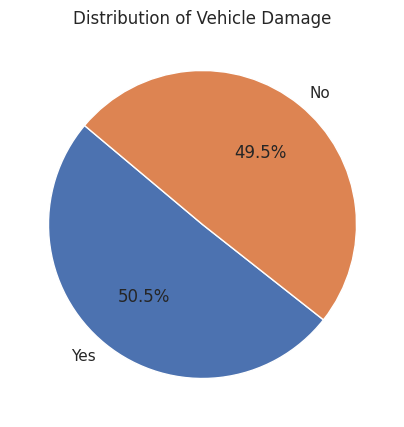

In [ ]:
# Chart - 7 visualization code
# Count the occurrences of each category in the 'Vehicle_Damage' column
damage_counts = df['Vehicle_Damage'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicle Damage')
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is used to represent the distribution of the "Vehicle_Damage" column because it's an effective way to showcase the relative proportions of different categories within a single variable.

##### 2. What is/are the insight(s) found from the chart?

The insight found that 50% of vehicles are damaged. The visual representation helps in understanding the relative distribution of the "Vehicle_Damage" categories, providing a quick and intuitive understanding of the dataset's contents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights into the frequency of vehicle damage can inform pricing strategies and risk assessments. Insurance companies can adjust their premium pricing and risk assessment models to better align with the likelihood of claims associated with vehicle damage, thereby optimizing profitability.

#### Chart - 8( Preference of people owing a driving license)

Text(0.5, 1.0, 'Preference of people owing a driving license')

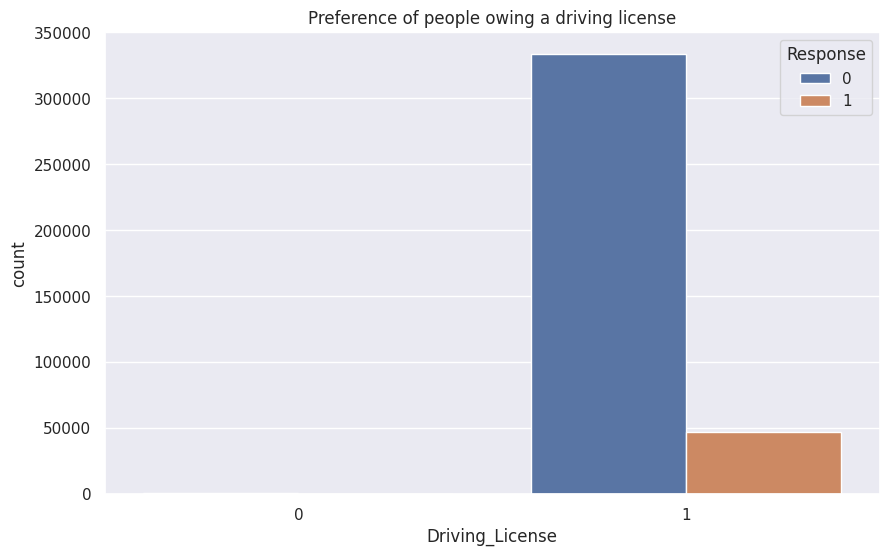

In [ ]:
# Chart - 8 visualization code
sns.countplot(x= df['Driving_License'],hue=df['Response'])
plt.title("Preference of people owing a driving license")

##### 1. Why did you pick the specific chart?

Bar plot is used to show the response of people owing a driving license.

##### 2. What is/are the insight(s) found from the chart?

Customers who are interested in Vehicle Insurance are having driving license

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People should be made aware that the people with driving license must have health insurance but people without driving license should also have insurance.

Chart - 9(response regarding Vehicle Insurance within the age range)

array([<Axes: title={'center': 'Response'}, xlabel='Age'>], dtype=object)

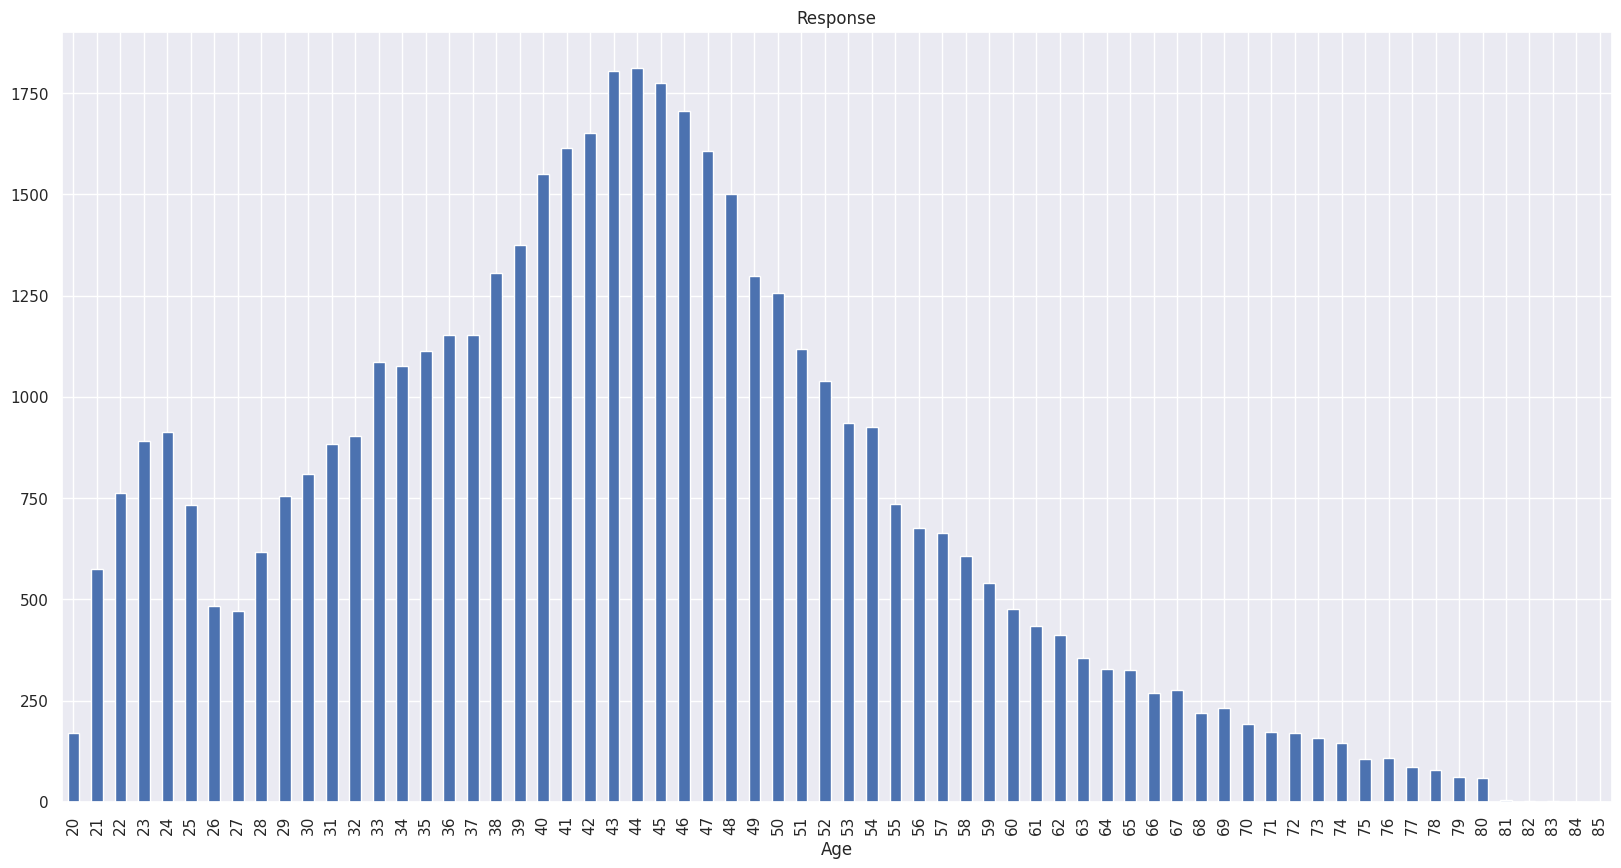

In [ ]:
# Chart - 9 visualization code
# Age wise plotting of graph
df_age = df.groupby('Age').sum()['Response']
#plotting the result
df_age.plot(kind='bar', subplots = True , figsize=(20,10))

##### 1. Why did you pick the specific chart?

Bar Chart is used to visually represent the proportions of different values within a variable.



##### 2. What is/are the insight(s) found from the chart?

The plot clearly shows that there is a significant level of interest and response regarding Vehicle Insurance within the age range of 40 to 48.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can observe that there is a considerable number of positive responses from the age groups above 40 to 48. Furthermore, it is noticeable that there is a consistent upward trend starting from the age of 28.

#### Chart - 10(Preference of Previously insured people)

In [ ]:
# Chart - 10 visualization code
# value count of previously insured
df['Previously_Insured'].value_counts()

,count
Previously_Insured,
0,206481
1,174628


In [ ]:
#Grouping positive responses with previously insured customers
df_pre_insured = df[df['Response']==1].groupby('Previously_Insured').count()['Response']
df_pre_insured

,Response
Previously_Insured,
0,46552
1,158


array([<Axes: ylabel='Response'>], dtype=object)

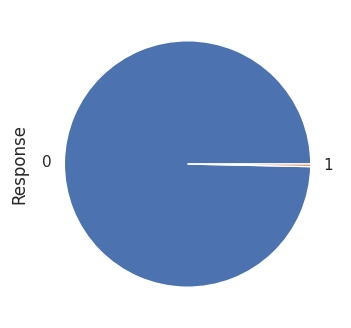

In [ ]:
# Plotting the pie chart
df_pre_insured.plot(kind = 'pie', subplots = True , figsize=(4,4))

##### 1. Why did you pick the specific chart?

I chose pie chart, which is created using the Matplotlib library, is a useful tool for visually representing the proportion or distribution of different values within a variable.

##### 2. What is/are the insight(s) found from the chart?

The Pie Chart illustrates the distribution of responses among individuals based on their previous insurance status. It indicates that people who do not have prior insurance coverage tend to overwhelmingly choose to opt in for vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 By observing the Pie Chart, the company can identify an opportunity to specifically target customers who do not have previous vehicle insurance. These customers are more likely to be open to considering and opting in for vehicle insurance. Therefore, the company can focus its efforts on actively reaching out to this particular group of customers.

#### Chart - 11(Distribution of Policy Sales Channel)

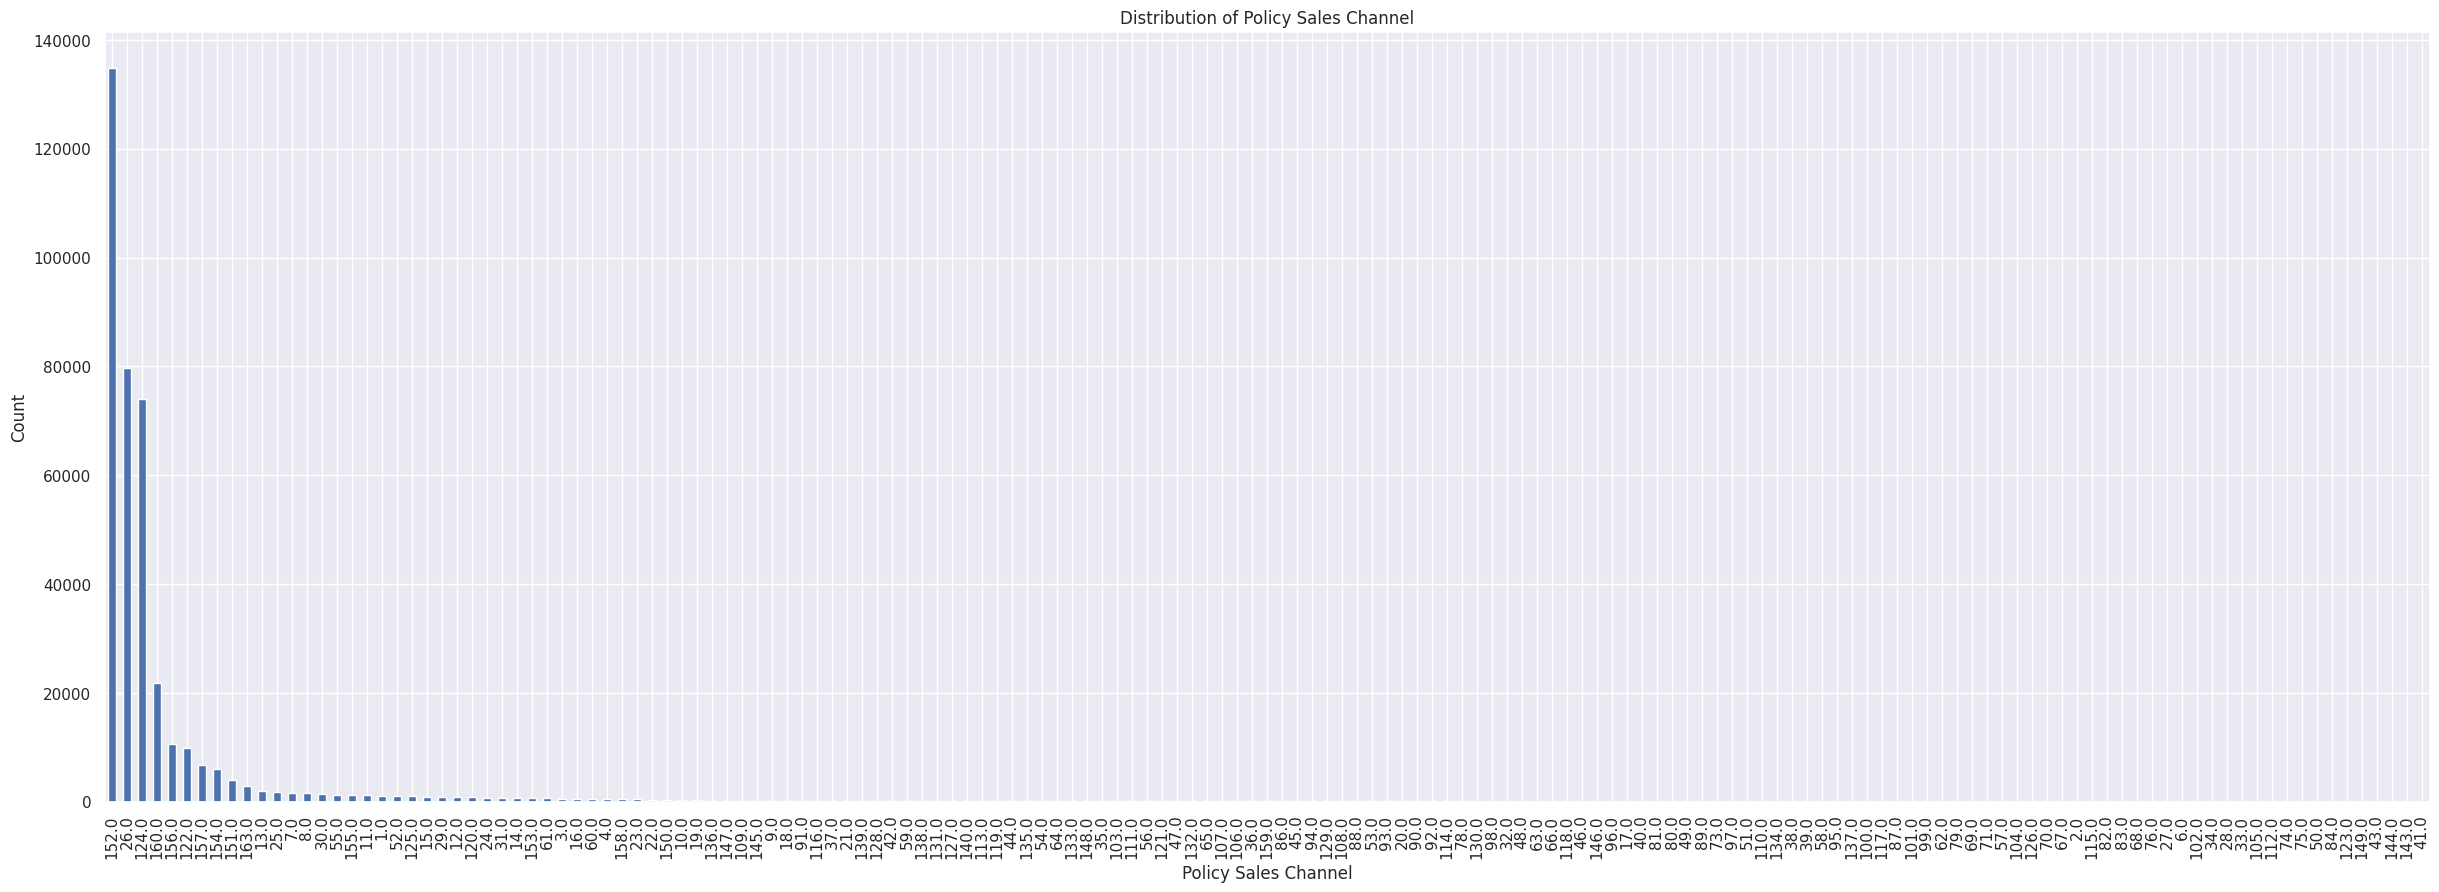

In [ ]:
# Chart - 11 visualization code
import matplotlib.pyplot as plt

# Create a bar chart for Policy_Sales_Channel
plt.figure(figsize=(30,10))
df['Policy_Sales_Channel'].value_counts().plot(kind='bar')
plt.title('Distribution of Policy Sales Channel')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the distribution of the "Policy_Sales_Channel" column

bar chart allows for a clear comparison of the number of occurrences for each policy sales channel. This visualization facilitates the identification of channels with higher or lower occurrences, providing insights into the distribution of policy sales.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the bar chart representing the distribution of the Policy Sales Channel in the dataset

The bar chart reveals the frequency or count of each policy sales channel within the dataset. It shows how the policy sales channels are distributed across the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Understanding the distribution of policy sales channels can help the company tailor marketing strategies to specific channels, thereby optimizing outreach efforts and maximizing customer engagement.

Negative Growth Insights:

If the insights reveal significant disparity in channel utilization, this might lead to uneven customer engagement across various channels, potentially impacting overall customer reach and, subsequently, lead to missed opportunities.

#### Chart - 12(histogram on each columns)

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Driving_License'}>],
       [<Axes: title={'center': 'Region_Code'}>,
        <Axes: title={'center': 'Previously_Insured'}>,
        <Axes: title={'center': 'Annual_Premium'}>],
       [<Axes: title={'center': 'Policy_Sales_Channel'}>,
        <Axes: title={'center': 'Vintage'}>,
        <Axes: title={'center': 'Response'}>]], dtype=object)

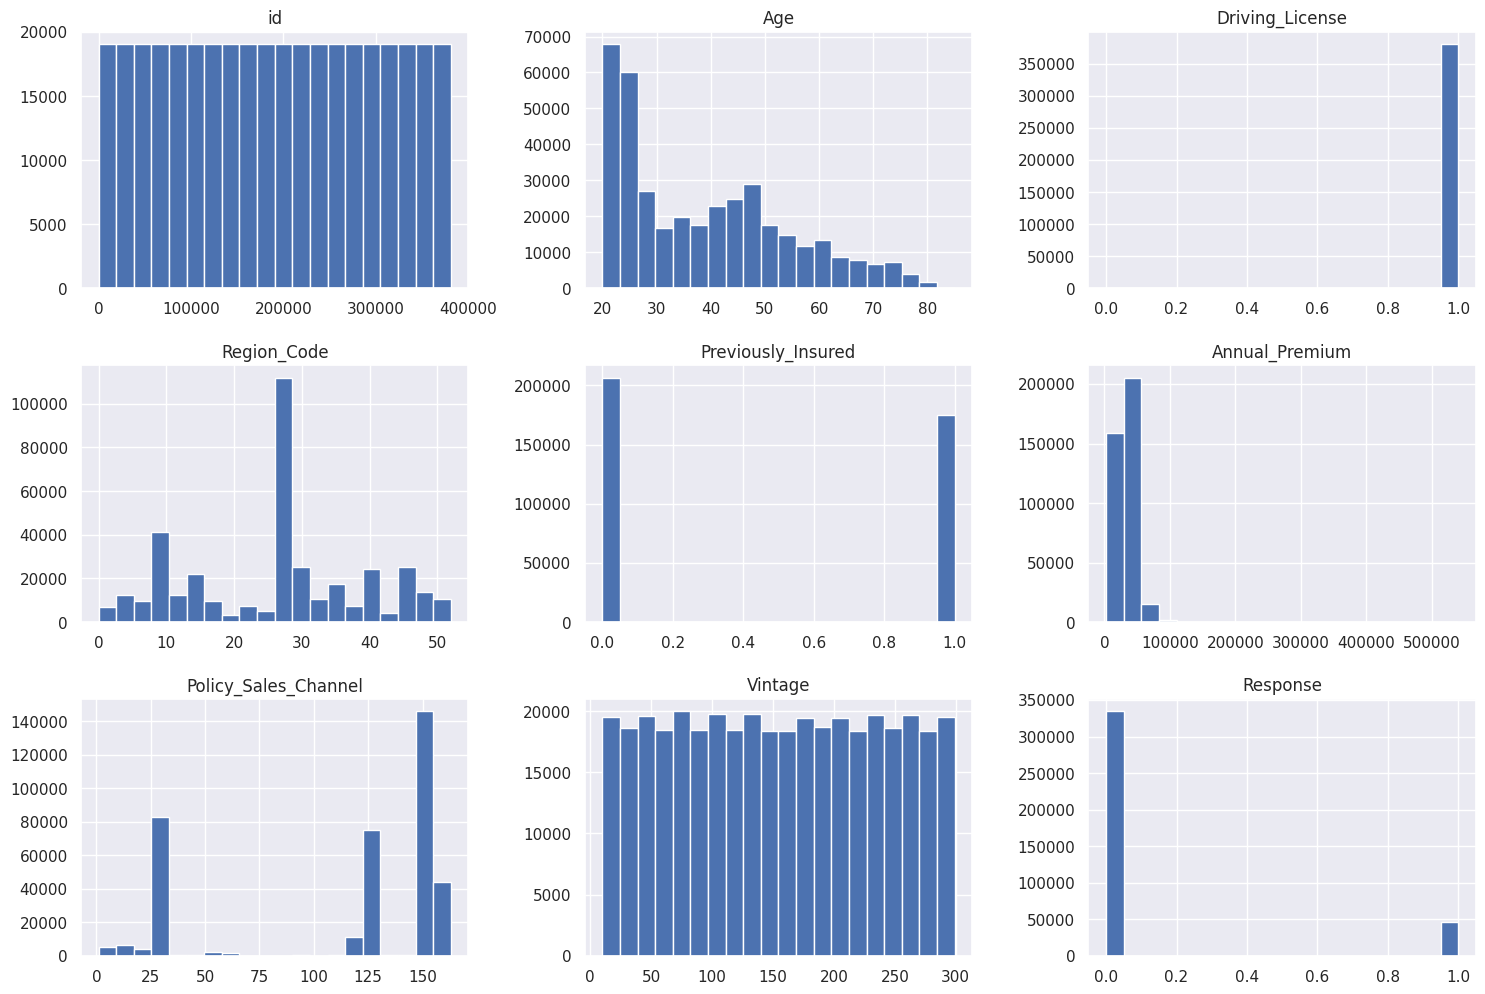

In [ ]:
# Chart - 12 visualization code
# Code for histogram
df.hist(bins = 20 , figsize = (18,12))

##### 1. Why did you pick the specific chart?

A histogram, created using the matplotlib library, is a useful tool for visualizing the distribution of values for a specific variable

##### 2. What is/are the insight(s) found from the chart?

This provides a visual representation of how the values are spread across all the columns in the dataset.

Chart - 13( distribute region by responce)

array([<Axes: xlabel='Region_Code'>], dtype=object)

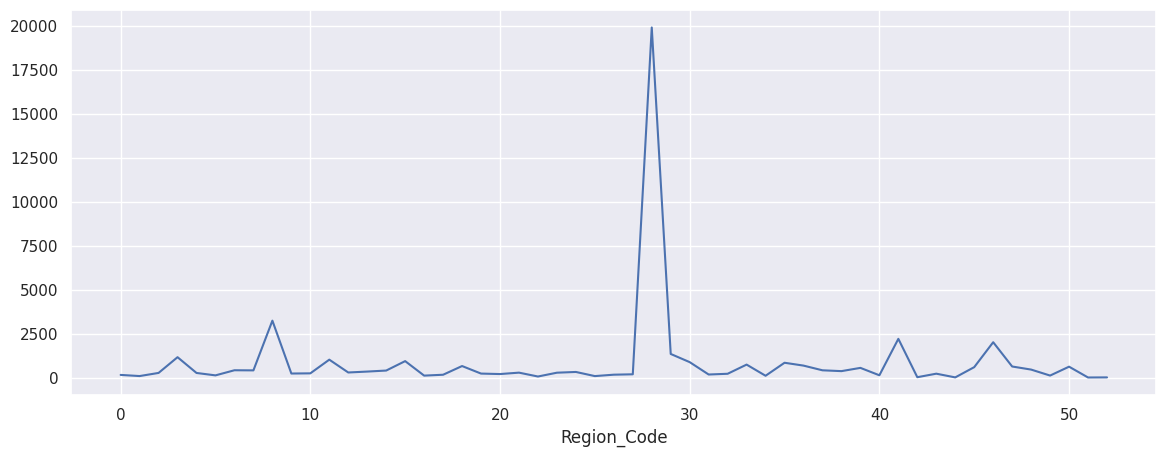

In [ ]:
# Chart - 13 visualization code
# grouping
df_region = df.groupby('Region_Code').sum()['Response']

# Plotting the response
df_region.plot(kind='line', subplots = True , figsize = (14,5) )

##### 1. Why did you pick the specific chart?

I chose Line plot because it is useful for showing how a variable changes in relation to another variable.

##### 2. What is/are the insight(s) found from the chart?

This line graph represents the favorable feedback received from customers in various regions. The data shows that Area code 28 received the highest number of positive responses, followed by codes 8 and 46.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company should pay close attention to area codes 28, 8, and 46 as these regions hold great potential for selling vehicle insurance.

#### Chart - 14 - Correlation Heatmap

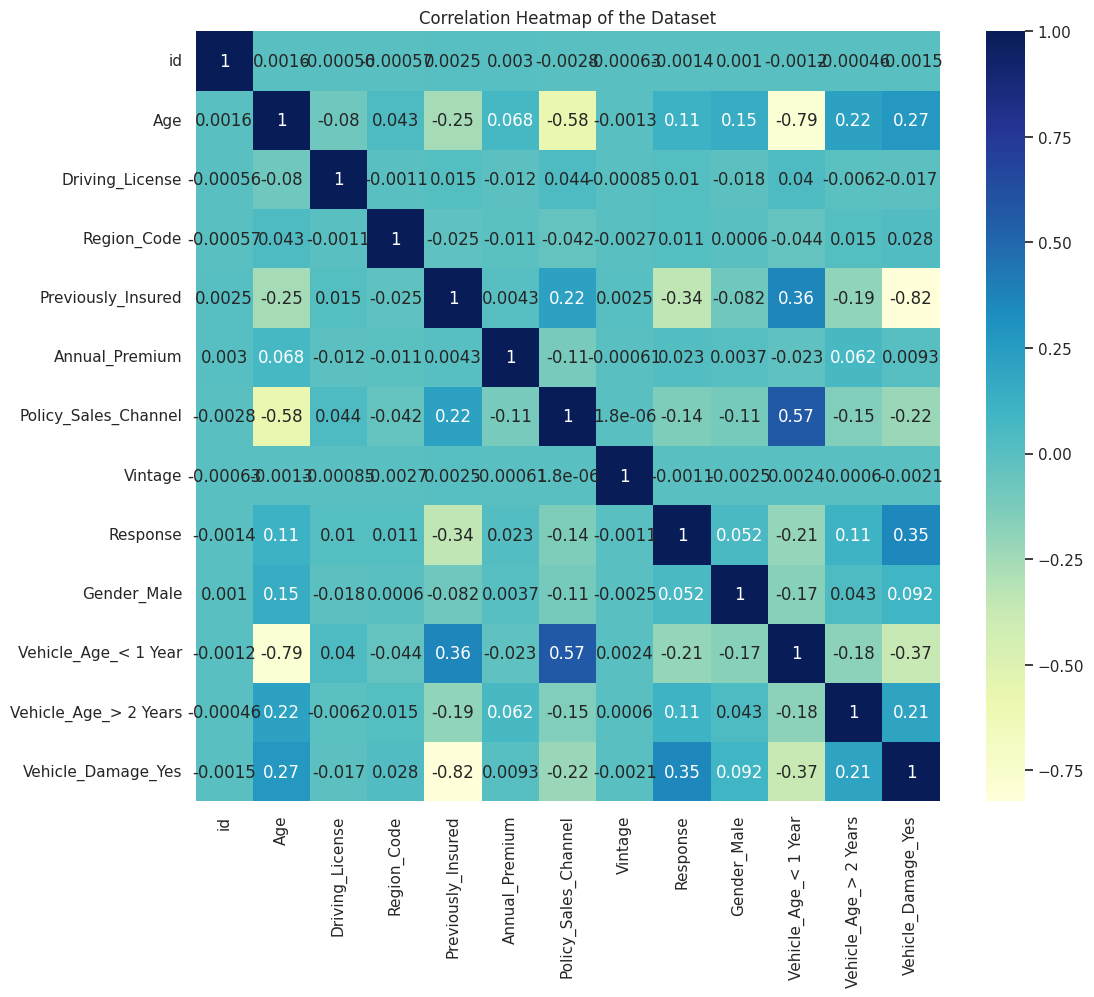

In [ ]:
# Correlation Heatmap visualization code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace non-numeric data with appropriate encoding using label encoding or one-hot encoding
# For simplicity, we assume that non-numeric columns like 'Gender', 'Vehicle_Age', and 'Vehicle_Damage' were properly encoded earlier
# For example, using pandas' get_dummies() for one-hot encoding or label encoding for ordinal variables

# Creating dummy variables for categorical columns
df1= pd.get_dummies(df, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)

# Calculating the correlation matrix
correlation_matrix = df1.corr()

# Creating the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap of the Dataset')
plt.show()

##### 1. Why did you pick the specific chart?

I recommended a correlation heatmap specifically because it provides an effective visual summary of the relationships between different variables in a dataset.

A correlation heatmap uses color intensity to represent the correlation values, making it easy to visualize both positive and negative relationships between variables within the dataset.

##### 2. What is/are the insight(s) found from the chart?

Strong Positive Correlations:

Look for pairs of variables that have a strong positive correlation (values close to 1.0). For instance, a strong positive correlation between 'Age' and 'Annual_Premium' might suggest that as age increases, the annual premium tends to increase as well.

Strong Negative Correlations:

Identify variables with strong negative correlations (values close to -1.0). An example could be a negative correlation between 'Previously_Insured' and 'Response', indicating that previously insured customers are less likely to respond to a cross-sell offer.

#### Chart - 15 - Pair Plot

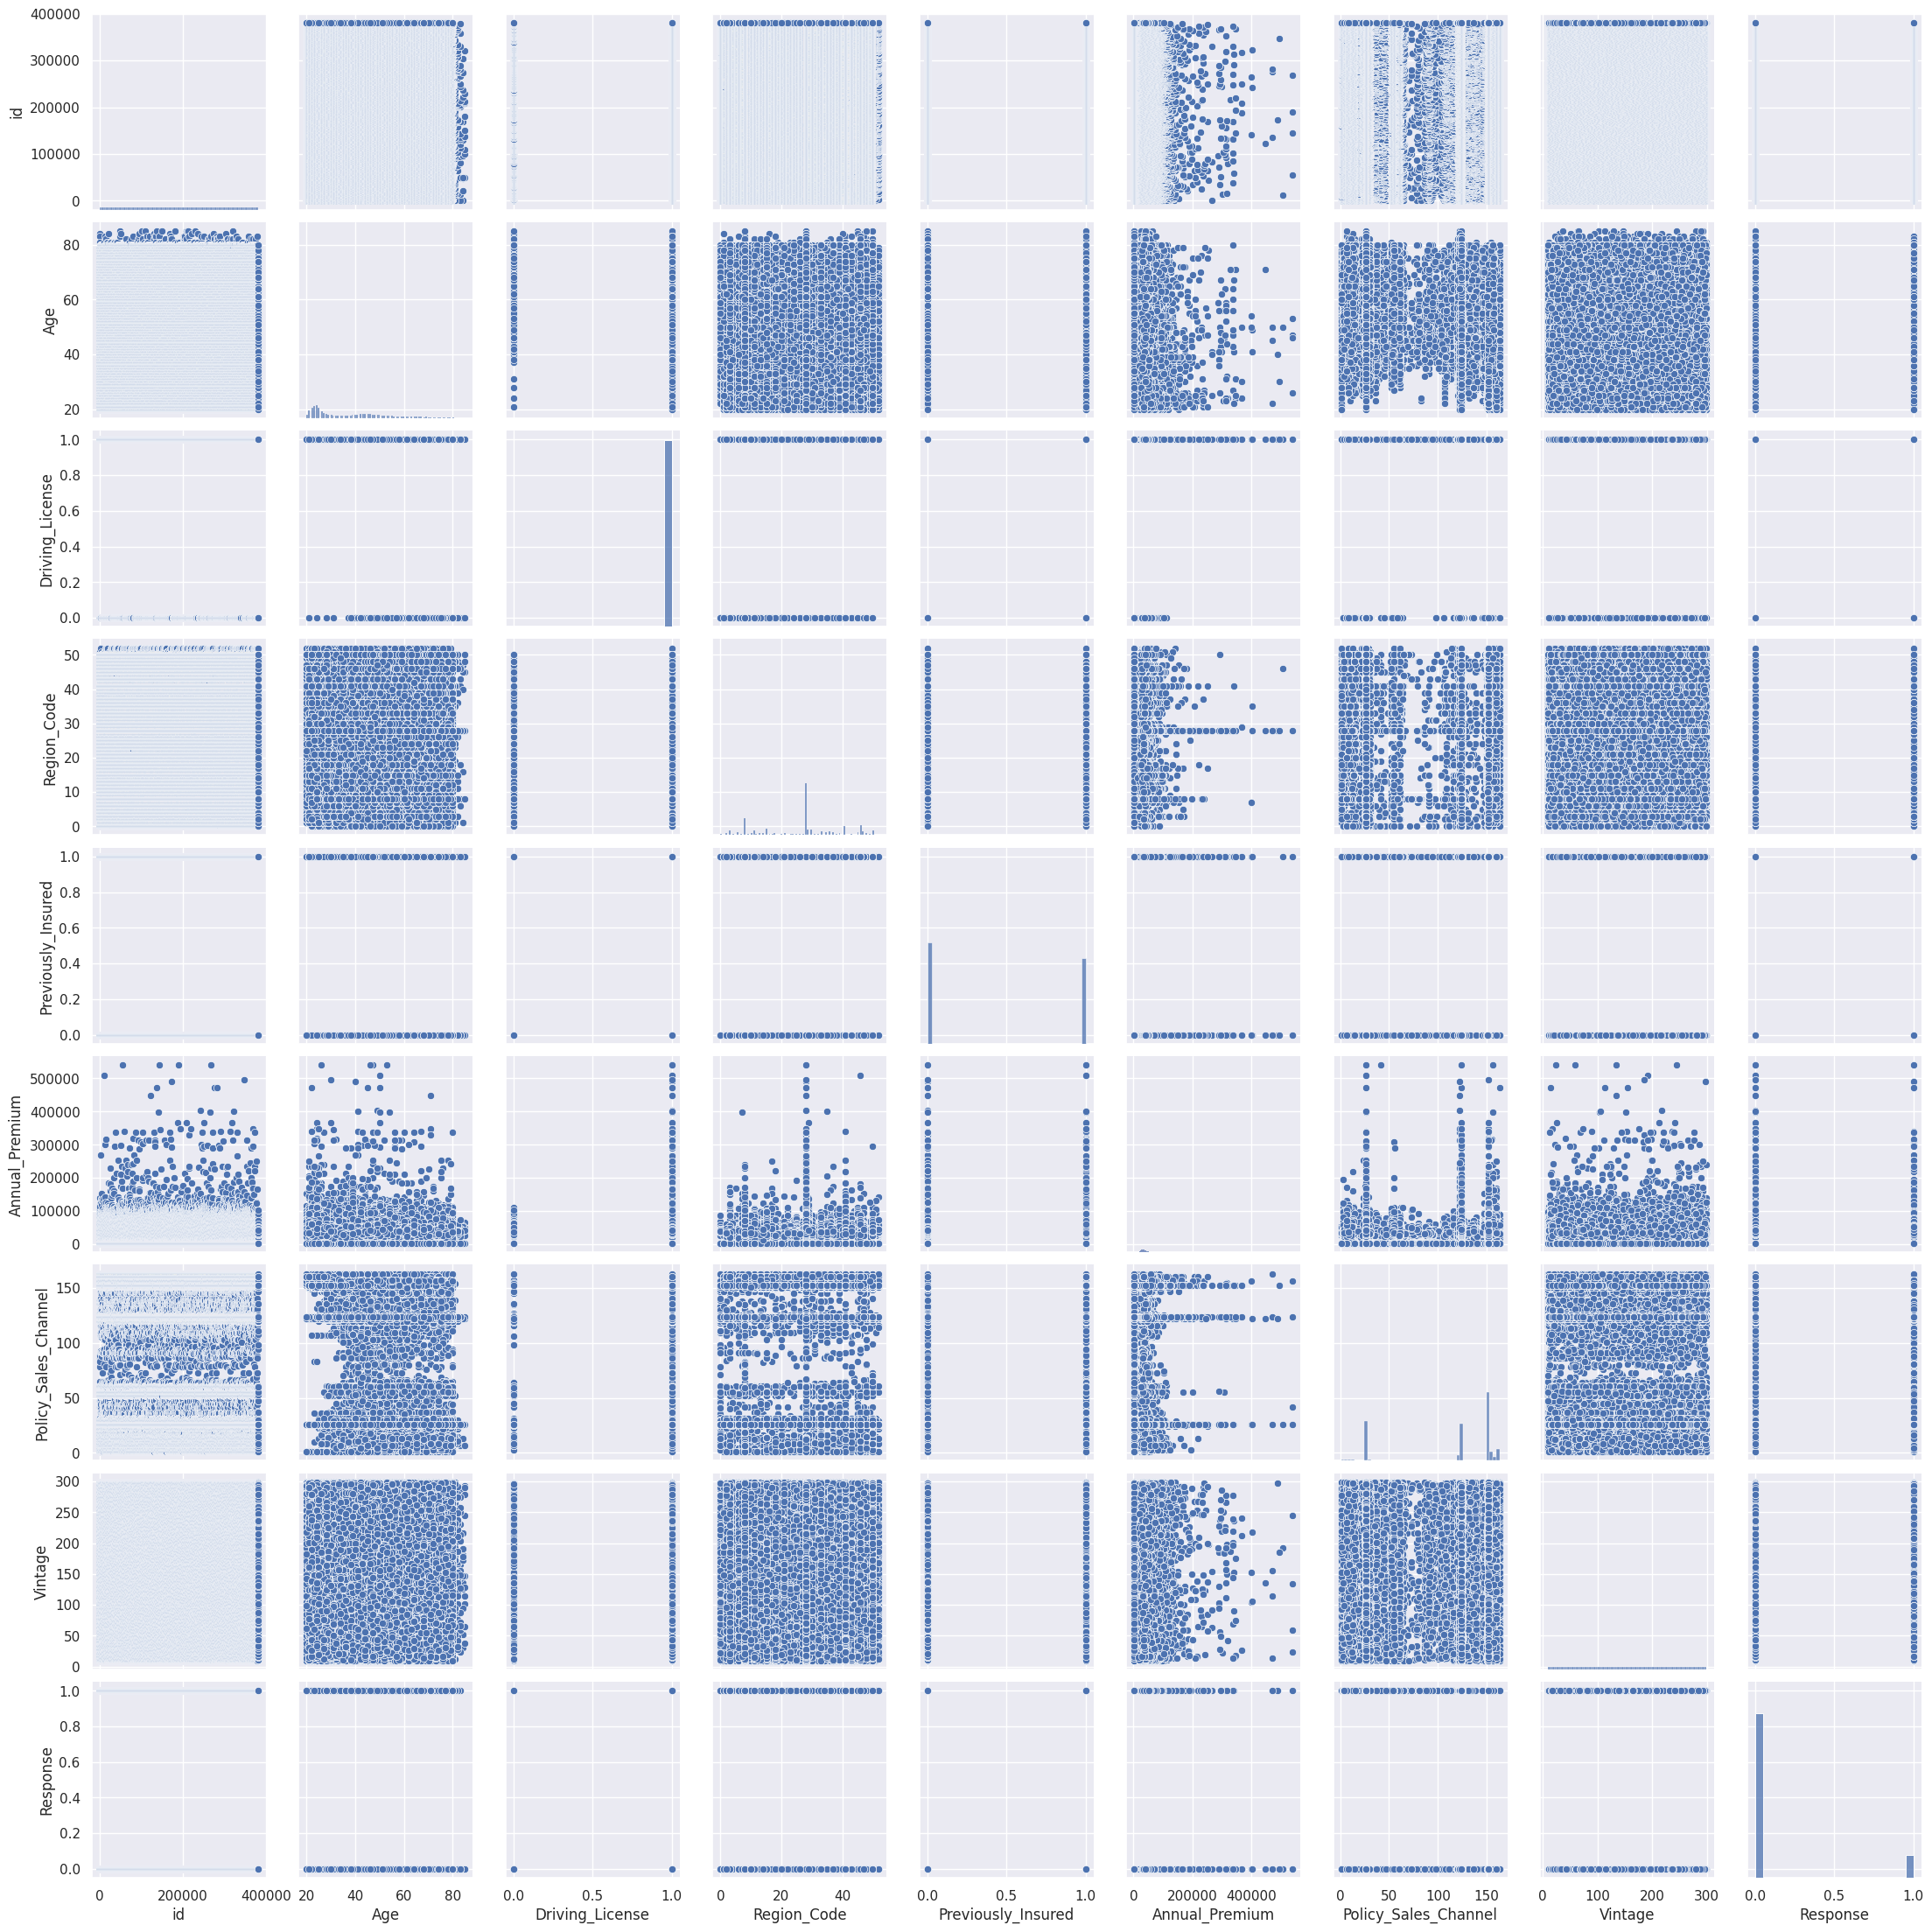

In [ ]:
# Pair Plot visualization code
# Create a pair plot
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

This type of chart is ideal for gaining insight into the distribution of individual variables and examining potential correlations or trends between multiple variables at a glance. Additionally, it enables the identification of potential outliers and the assessment of variable distributions and relationships, facilitating initial exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

The pair plot provides a visual representation of the relationships between numerical variables like Age, Annual Premium, Policy Sales Channel, Region Code, and Vintage. For instance, it can reveal correlations or lack thereof between these variables.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Statement 1: The average age of drivers is different for males and females.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The average age of drivers is the same for males and females.

Alternative hypothesis: The average age of drivers is different for males and females.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Assuming the DataFrame contains 'Age' and 'Gender' columns
t_stat, p_value = ttest_ind(df.loc[df['Gender'] == 'Male', 'Age'], df.loc[df['Gender'] == 'Female', 'Age'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Checking the p-value to determine whether to reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis.  The average age of drivers is the same for males and females.")
else:
    print("Fail to reject the null hypothesis. The average age of drivers is different for males and females.")

t-statistic: 90.81763394795337
p-value: 0.0
Reject the null hypothesis.  The average age of drivers is the same for males and females.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is an independent two-sample t-test, also known as the Student's t-test for independent samples. This test compares the means of two independent groups to determine whether there is a statistically significant difference between the means of these groups.

##### Why did you choose the specific statistical test?

The ttest_ind function from scipy.stats computes the T-test for the means of two independent samples. It compares the average age of male drivers with the average age of female drivers.

A larger t-statistic implies a larger difference between the groups. The p-value indicates the probability of observing the given result (or a more extreme result) if the null hypothesis is true. In this case, the t-statistic is approximately 90, and the p-value is 0. This extremely low p-value suggests strong evidence against the null hypothesis, indicating that the average age of male and female drivers is significantly different. Conclusion: Based on the provided t-statistic and p-value, there is strong evidence to reject the null hypothesis. This suggests that the average age of drivers is indeed different for males and females. The extremely low p-value indicates that the difference in average age between male and female drivers is statistically significant.

### Hypothetical Statement - 2

Statement - 2 The proportion of drivers with a driving license is different for different regions.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The proportion of drivers with a driving license is the same for all regions.

Alternative hypothesis: The proportion of drivers with a driving license is different for different regions.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming df is the DataFrame containing 'Region_Code' and 'Driving_License'
chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df['Region_Code'], df['Driving_License']))
print(chi2)
print(p_value)
# Checking the p-value to determine whether to reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis. The proportion of drivers with a driving license is different for different regions.")
else:
    print("Fail to reject the null hypothesis. The proportion of drivers with a driving license is the same for all regions.")

204.0899235109625
6.789861860677721e-20
Reject the null hypothesis. The proportion of drivers with a driving license is different for different regions.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the Chi-squared test of independence. This test evaluates whether there is a significant association between two categorical variables. In this case, the test is used to determine if there is an association between the "Region_Code" and "Driving_License" variables.

##### Why did you choose the specific statistical test?

The code then compares the calculated p-value with a significance level (usually 0.05). If the p-value is less than the chosen significance level (0.05), the null hypothesis is rejected. This indicates that there is evidence to support the alternative hypothesis. If the p-value is greater than the significance level, the code concludes that there is not enough evidence to reject the null hypothesis.

### Hypothetical Statement - 3

Statement 3 : The average annual premium is higher for vehicles that are damaged.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The average annual premium is the same for vehicles that are damaged and not damaged.

Alternative hypothesis: The average annual premium is higher for vehicles that are damaged.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
# Statement 3: The average annual premium is higher for vehicles that are damaged.

t_stat, p_value = ttest_ind(df[df['Vehicle_Damage'] == 'Yes']['Annual_Premium'], df[df['Vehicle_Damage'] == 'No']['Annual_Premium']) # Use ttest_ind directly from scipy.stats
print(t_stat)
print(p_value)
if p_value < 0.05:

    print("Reject the null hypothesis. The average annual premium is higher for vehicles that are damaged.")
else:
    print("Fail to reject the null hypothesis. The average annual premium is the same for vehicles that are damaged and not damaged.")

5.771930875281367
7.842872862189239e-09
Reject the null hypothesis. The average annual premium is higher for vehicles that are damaged.


##### Which statistical test have you done to obtain P-Value?

The statistical test that has been used to obtain the p-value is the independent samples t-test (also known as the two-sample t-test) using the ttest_ind function from the scipy.stats module.

The independent samples t-test is used to determine whether there is a significant difference between the means of two independent groups.

##### Why did you choose the specific statistical test?

scipy.stats is used to calculate the t-test statistic (t_stat) and p-value (p_value) for the annual premiums of damaged and non-damaged vehicles.

The t-test is conducted under the assumption that the two groups (damaged and non-damaged vehicles) have equal variance.

The t-test will assess whether the difference in the means of the two groups is statistically significant.

The code then compares the calculated p-value to a significance level of 0.05.

If the p-value is less than 0.05, it rejects the null hypothesis. If the p-value is greater than or equal to 0.05, it fails to reject the null hypothesis.

The code prints the decision based on the comparison as a conclusion.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the Dataset

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# IQR = interquartile range

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
for col in ['Annual_Premium','Vintage']:
  outliers = find_outliers_IQR(df[col])
  print(f"column name is {col}")
  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))

  outliers

column name is Annual_Premium
number of outliers: 10320
max outlier value: 540165.0
min outlier value: 61893.0
column name is Vintage
number of outliers: 0
max outlier value: nan
min outlier value: nan


In [ ]:
df=df[(df['Annual_Premium'] < 60090.0)]

<Axes: >

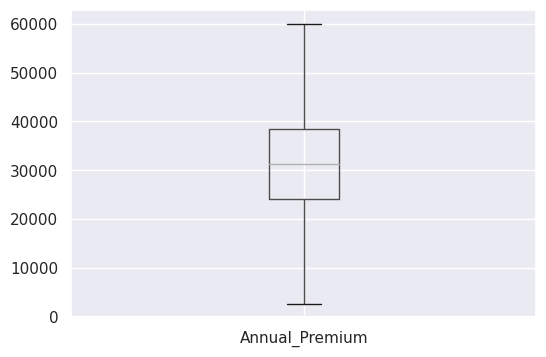

In [ ]:
#plotting boxplot for outlier detection

df.boxplot(column = (['Annual_Premium']),figsize=(6,4))

In [ ]:
df.shape

(369037, 12)

##### What all outlier treatment techniques have you used and why did you use those techniques?


The Interquartile Range (IQR) technique is a method commonly used to identify and handle outliers in a dataset.

This approach involves using the IQR to detect and potentially remove or adjust outliers.

### 3. Feature Engineering

In [ ]:
# Categorizing Age feature
df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

#Splitting the premium based on mean
df['Low_premium'] = df['Annual_Premium']<= df['Annual_Premium'].mean()
df['High_premium'] = df['Annual_Premium']> df['Annual_Premium'].mean()

# drop Age and Annual_Premium column
df = df.drop(columns=['Age','Annual_Premium'])

df.head()

,id,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Age_Group,Low_premium,High_premium
0,1,Male,1,28.0,0,> 2 Years,Yes,26.0,217,1,YoungAge,False,True
1,2,Male,1,3.0,0,1-2 Year,No,26.0,183,0,OldAge,False,True
2,3,Male,1,28.0,0,> 2 Years,Yes,26.0,27,1,MiddleAge,False,True
3,4,Male,1,11.0,1,< 1 Year,No,152.0,203,0,YoungAge,True,False
4,5,Female,1,41.0,1,< 1 Year,No,152.0,39,0,YoungAge,True,False


In [ ]:
### 3. Categorical Encoding

In [ ]:
#changing catagorical value to binary form(0 and 1) using labelEncoder
from sklearn.preprocessing import LabelEncoder
labelEncoder= LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = labelEncoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = labelEncoder.fit_transform(df['Vehicle_Damage'])
df["Low_premium"] = labelEncoder.fit_transform(df["Low_premium"])
df["High_premium"] = labelEncoder.fit_transform(df["High_premium"])
df["Age_Group"]= labelEncoder.fit_transform(df["Age_Group"])
df.head()

,id,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Age_Group,Low_premium,High_premium
0,1,1,1,28.0,0,2,1,26.0,217,1,2,0,1
1,2,1,1,3.0,0,0,0,26.0,183,0,1,0,1
2,3,1,1,28.0,0,2,1,26.0,27,1,0,0,1
3,4,1,1,11.0,1,1,0,152.0,203,0,2,1,0
4,5,0,1,41.0,1,1,0,152.0,39,0,2,1,0


What all categorical encoding techniques have you used & why did you use those techniques?

I use LableEncoding technique and in above case. these technique are important for converting categorical data into numerical format

### 6. Data Scaling

In [ ]:
# Scaling your data
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ["Region_Code", "Policy_Sales_Channel","Vintage"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# The scaled numerical data is updated in the existing dataset
print(df)

            id  Gender  Driving_License  Region_Code  Previously_Insured  \
0            1       1                1     0.116822                   0   
1            2       1                1    -1.759430                   0   
2            3       1                1     0.116822                   0   
3            4       1                1    -1.159029                   1   
4            5       0                1     1.092473                   1   
...        ...     ...              ...          ...                 ...   
381104  381105       1                1    -0.033278                   1   
381105  381106       1                1     0.792273                   1   
381106  381107       1                1     0.266922                   1   
381107  381108       0                1    -0.933879                   0   
381108  381109       1                1     0.191872                   0   

        Vehicle_Age  Vehicle_Damage  Policy_Sales_Channel   Vintage  Response  \
0     

##### Which method have you used to scale you data and why?

I used the StandardScaler method from scikit-learn to scale the numerical columns. This method performs standardization on the numerical data, which transforms the data such that its distribution has a mean value of 0 and a standard deviation of 1. I chose to use standardization because Robustness to Outliers:

It is less sensitive to the presence of outliers as compared to other scaling methods due to its use of the mean and standard deviation.

Effective for Many Algorithms:

Standardization is commonly used in many machine learning algorithms and is generally a safe choice as a preprocessing step in the majority of cases.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

 We did not employ dimensionality reduction techniques as the number of variables in our dataset was relatively small and aligned with the desired dimension.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
# spilt the dependent and independant variables
# Creating the dataset with all independent variables
input_df=df.drop(['Response'],axis=1)
# Creating the dataset with all dependent variables
output_df=df['Response']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input_df,output_df,test_size=0.3,random_state=42)

In [ ]:
df.shape

(369037, 13)

In [ ]:
# after spliting training shape of detaset
x_train.shape,y_train.shape

((258325, 12), (258325,))

##### What data splitting ratio have you used and why?

I have used a 70-30 data splitting ratio, with 70% of the data as the training set and 30% as the testing set. The reason for selecting this split is as

The 70-30 split is a common and widely accepted practice in the field of machine learning. It strikes a good balance between providing enough data for training and reserving a sufficient amount for testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

yes the given dataset is imbalanced because the data having different object type of data so to Ensemble techniques like RandomForest and XGBoost can handle imbalanced datasets by giving more weight to minority class samples.

To check for imbalance, we need to analyze the distribution of the target variable. If one class heavily outweighs the other, it indicates an imbalance. Typically, if one class represents less than 20% of the data, it's considered imbalanced.

by examining the distribution of the "Response" variable and comparing the frequency of positive and negative responses, we can assess whether the dataset is imbalanced.

Text(0.5, 1.0, 'Response')

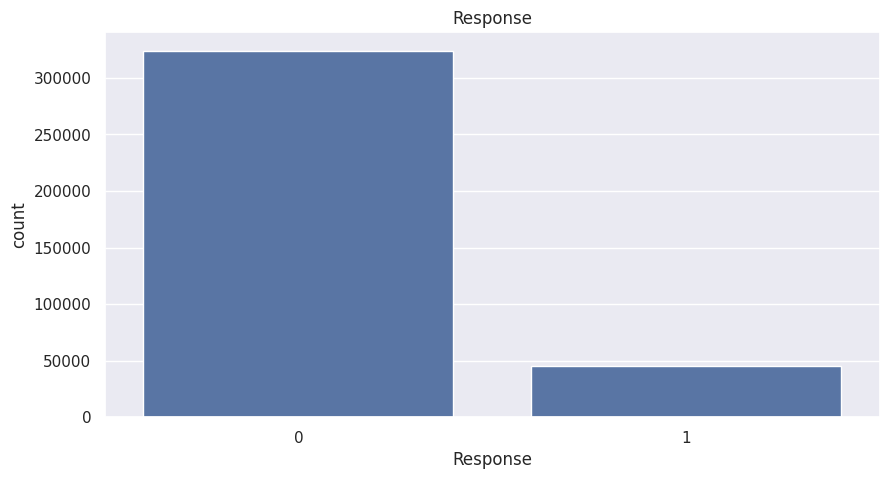

In [ ]:
# Handling Imbalanced Dataset (If needed)
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=df['Response'])
plt.title('Response')

SMOTE technique: it is a popular method used to handle imbalanced datasets when addressing the scarcity of instances in the minority class. It works by generating synthetic instances of the minority class to balance the class distribution.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming x_train, x_test, y_train, and y_test are already split from the dataset

# Handling imbalanced data using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

# Using RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_res, y_res)

# Making predictions
y_pred = rf_model.predict(x_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 83.68288893706193
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     97087
           1       0.31      0.26      0.28     13625

    accuracy                           0.84    110712
   macro avg       0.60      0.59      0.59    110712
weighted avg       0.82      0.84      0.83    110712



##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

There are several techniques to address imbalanced datasets:I use Random forest technique to handle imbalanced dataset.In Random Forest, you can set the class_weight parameter to "balanced" during model initialization. This automatically adjusts the weights inversely proportional to class frequencies in the input data. This makes the model focus more on the minority class.

## ***7. ML Model Implementation***

### ML Model - 1(Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Train the Logistic Regression model
reg = LogisticRegression()
reg.fit(x_train, y_train)

# Make predictions and probabilities
pred = reg.predict(x_test)
lr_probability = reg.predict_proba(x_test)[:, 1]

# Calculate evaluation metrics
acc_lr = accuracy_score(y_test, pred)
recall_lr = recall_score(y_test, pred)
precision_lr = precision_score(y_test, pred)
f1score_lr = f1_score(y_test, pred)

# AUC calculation with probabilities
AUC_LR = roc_auc_score(y_test, lr_probability)

# Print accuracy and AUC values of the model
print("Accuracy: ", acc_lr)
print("ROC_AUC Score:", AUC_LR)

Accuracy:  0.8769329431317292
ROC_AUC Score: 0.5010026391726781


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# classification report for testing data
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    110712
           1       0.00      0.00      0.00         0

    accuracy                           0.88    110712
   macro avg       0.50      0.44      0.47    110712
weighted avg       1.00      0.88      0.93    110712



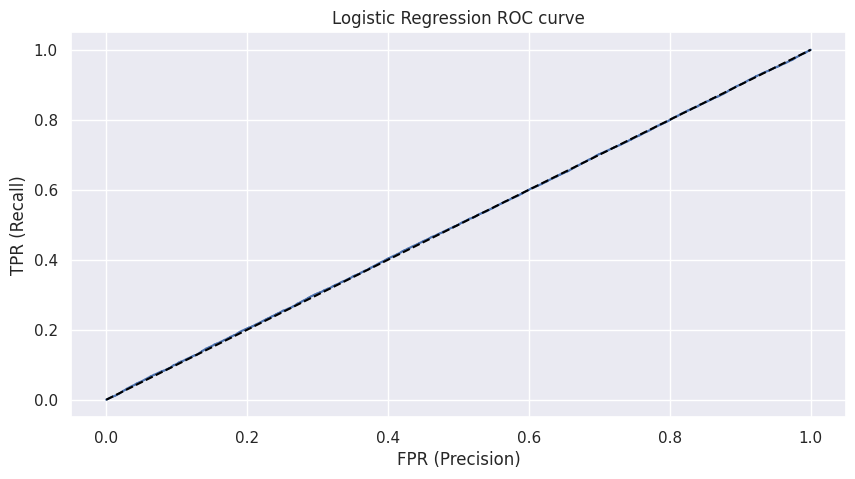

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Confusion Matrix

[[97087     0]
 [13625     0]]


<Axes: >

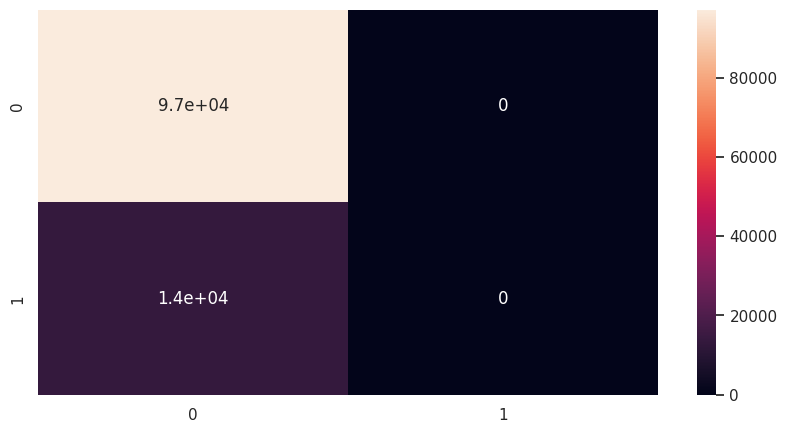

In [ ]:
# visualize a confusion matrix
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)

Model 2 -Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest=randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
RF_probability = randomforest.predict_proba(x_test)[:,1]

AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print("Accuracy:",accuracy_score(y_pred,y_test)*100)
print("ROC_AUC Score:",AUC_RF)

Accuracy: 86.16048847460075
ROC_AUC Score: 0.6160750407836674


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test contains the true labels for the test set
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     97087
           1       0.34      0.14      0.20     13625

    accuracy                           0.86    110712
   macro avg       0.62      0.55      0.56    110712
weighted avg       0.82      0.86      0.83    110712



ROC CURVE

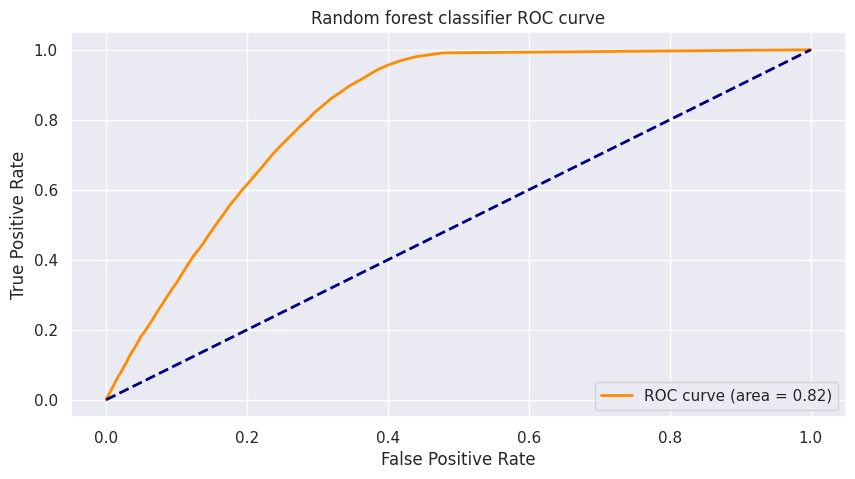

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming RF_probability contains the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, RF_probability)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest classifier ROC curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix

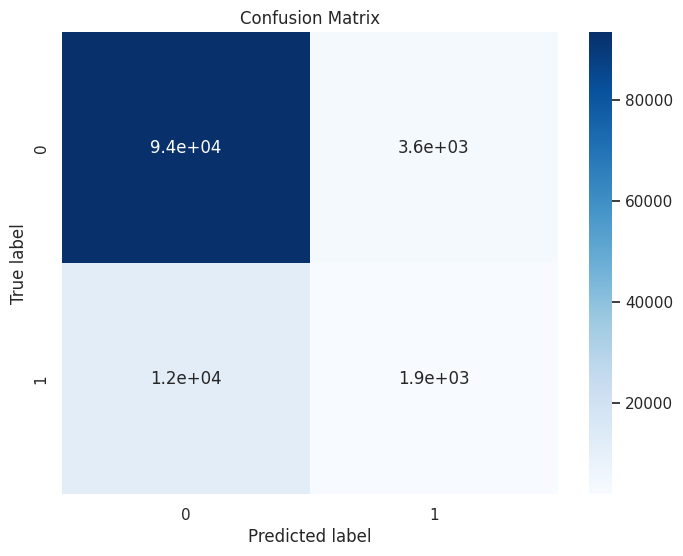

In [ ]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Implementation with hyperparameter optimization techniques ( GridSearch CV)
classifier = RandomForestClassifier()
grid_values = {'n_estimators':[30,50, 80,  100], 'max_depth':[2,3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 7],
                         'n_estimators': [30, 50, 80, 100]},
             scoring='roc_auc')

In [ ]:
RF_probability = classifier.predict_proba(x_test)[:,1]
train_preds =  classifier.predict(x_train)
test_preds  = classifier.predict(x_test)
AUC_RF=roc_auc_score(y_test,test_preds)
acc_rf=accuracy_score(y_test,test_preds)
recall_rf=recall_score(y_test,test_preds)
precision_rf=precision_score(y_test,test_preds)
f1score_rf=f1_score(y_test,test_preds)

print(accuracy_score(test_preds,y_test)*100)
print("ROC_AUC Score:",AUC_RF)

87.69329431317291
ROC_AUC Score: 0.5


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report - Test Part:")
print(classification_report(y_test,test_preds))

Classification Report - Test Part:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     97087
           1       0.00      0.00      0.00     13625

    accuracy                           0.88    110712
   macro avg       0.44      0.50      0.47    110712
weighted avg       0.77      0.88      0.82    110712



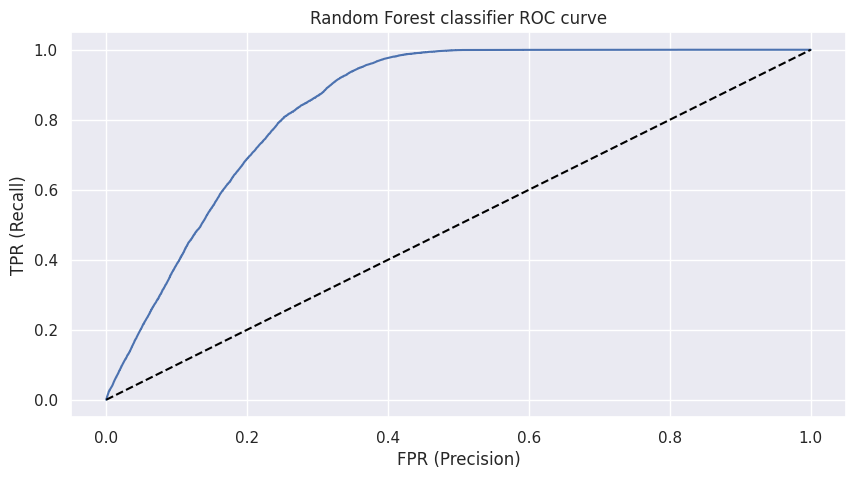

In [ ]:
# RF ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Random Forest classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Confusion Matrix

[[93522 11757]
 [ 3565  1868]]


<Axes: >

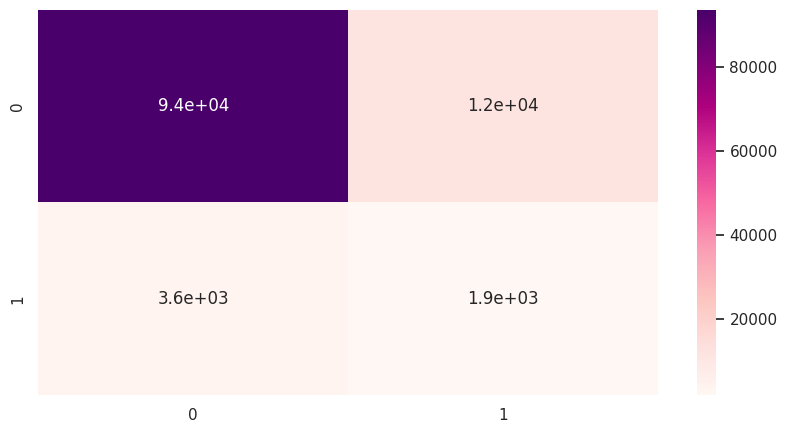

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

##### Which hyperparameter optimization technique have you used and why?

In the above case, the hyperparameter optimization technique used is GridSearchCV. GridSearchCV is chosen for hyperparameter optimization for Cross-Validation GridSearchCV integrates cross-validation into the search process, ensuring that the model's performance is assessed across different subsets of the training data. This helps in obtaining a more robust estimation of the model's performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No beacause the accuracy of logistic regression model and hyper parameter tunning using gridsearchcv are almost same

### ML Model - 3(XGB CLASSIFIER)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(x_train, y_train)
y_predict = XGB_fit.predict(x_test)
XGB_probability = XGB_fit.predict_proba(x_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_predict,y_test)


print("Accuracy:",accuracy_score(y_predict,y_test)*100)
print("ROC_AUC Score:",AUC_xgb)

Accuracy: 87.60567960112725
ROC_AUC Score: 0.6375655143967441


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    110241
           1       0.01      0.40      0.03       471

    accuracy                           0.88    110712
   macro avg       0.51      0.64      0.48    110712
weighted avg       0.99      0.88      0.93    110712



ROC CURVE

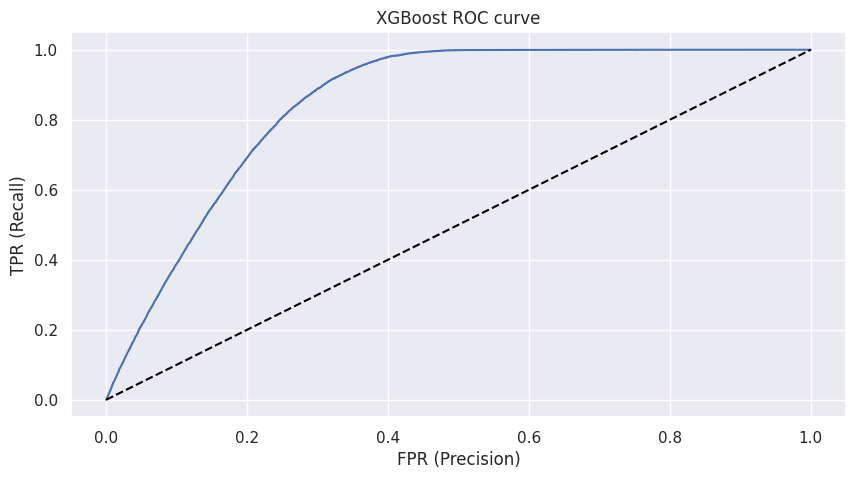

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Confusion Matrix

[[96803   284]
 [13438   187]]


<Axes: >

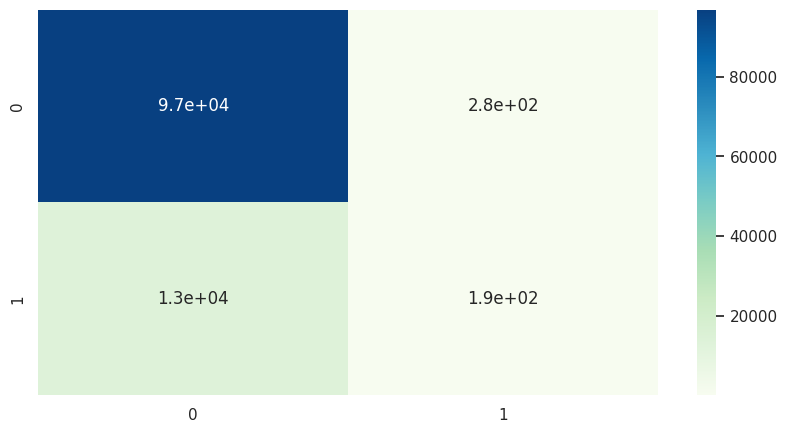

In [ ]:
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

#### 2. Cross- Validation & Hyperparameter Tuning

NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Assuming x_train and x_test contain the feature data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the Multinomial Naive Bayes model using the scaled data
sentiment_model = MultinomialNB().fit(x_train_scaled, y_train)

# Make predictions and compute metrics
predictions_test = sentiment_model.predict(x_test_scaled)
predictions_train = sentiment_model.predict(x_train_scaled)
acc_naive = accuracy_score(y_test, predictions_test)
recall_naive = recall_score(y_test, predictions_test)
precision_naive = precision_score(y_test, predictions_test)
f1score_naive = f1_score(y_test, predictions_test)

AUC_naive = roc_auc_score(y_test, predictions_test)

print("Accuracy: ", acc_naive*100)
print("ROC_AUC Score: ", AUC_naive)

Accuracy:  87.69329431317291
ROC_AUC Score:  0.5


In [ ]:
# Print the classification report for test

print('Test set report')
print("\n")
print(classification_report(y_test,predictions_test))

Test set report


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     97087
           1       0.00      0.00      0.00     13625

    accuracy                           0.88    110712
   macro avg       0.44      0.50      0.47    110712
weighted avg       0.77      0.88      0.82    110712



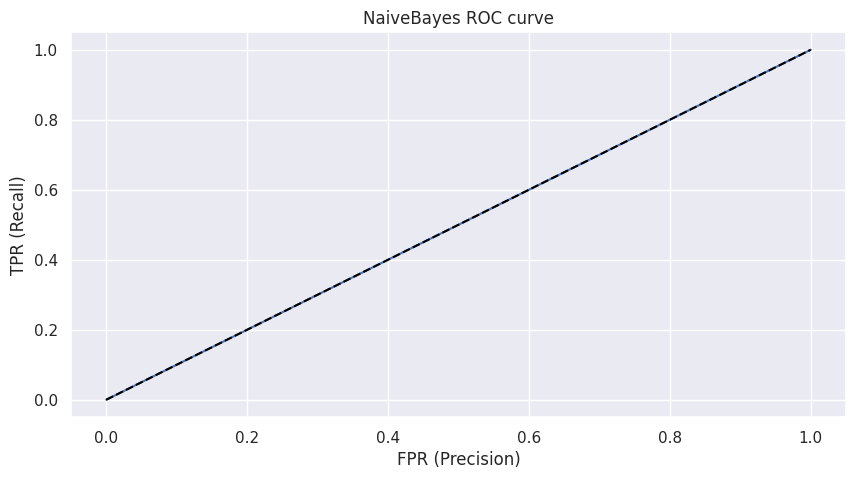

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, predictions_test)

plt.title('NaiveBayes ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Confusion Matrix


[[227074  31251]
 [     0      0]]


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative')]

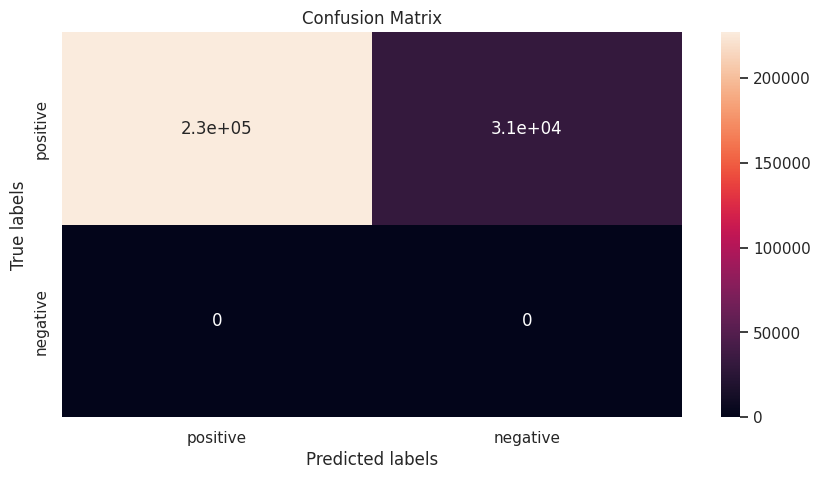

In [ ]:
# getting train set confusion matrix

labels = ['positive','negative']
cm_test = confusion_matrix(predictions_train,y_train)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

I use NAIVE BAYES CLASSIFIER for hyperparameter optimization technique which might be give better accuracy than logistic regression and Random forest classifier.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I saw the improvement by using the hyperparameter optimization technique the data will goes of case of overfitting. I found AUC-ROC curve in straight linewhich will be overfitting case

COMPAIRING THE MODELS

In [ ]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.876933,0.000000,0.000000,0.000000,0.501003
Randomforest,0.876933,0.000000,0.000000,0.000000,0.500000
XGBClassifier,0.876057,0.013725,0.397028,0.026532,0.637566


The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Logistic regression and XGBClassifier models performed better than Randomforest model. Thus, for the given problem, the models created by Logistic regression and XGBClassifier. Logistic regression is the best modeling technique as it has a accuracy of 87%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

When considering evaluation metrics to have a positive business impact, it's important to focus on metrics that align with the specific business objectives and requirements. The choice of metrics should reflect the priorities and goals of the business.I think accuracy will empact on positive business because Accuracy is Straightforward and easy to understand, accuracy indicates the proportion of correctly predicted instances. However, it may not be suitable in cases of class imbalance where the data is skewed towards one class.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After careful evaluation, we have determined that the Logistic Regression model is the most suitable choice among the models developed. It excels in accurately predicting whether a customer has opted for vehicle insurance,accuracy of logistic regression module is 87% by achieving impressive F1-scores of 93% of testing model These scores are particularly notable considering the presence of irrelevant data in the dataset.

I choose Logistic Regression algorithm to train the model with 87% accuracy

# **Conclusion**

In the dataset I mention that the presence of missing values and duplicates value is zero 1.) There is a big difference between the number of positive and negative responses from customers.

2.) Males show more interest in buying vehicle insurance

3.) Tthe age group 20 has more interest to have insurence of vehicles

4.) Policyholders in the age groups 27-45 show the most interest in vehicle insurance.

5.) Area code 28 has the highest response, followed by codes 8 and 46.

6.)the vehicle age distribution, maximum number of vehicles having age 1 to 2 years

7.) Customers with driving licenses are more likely to purchase vehicle insurance.

8.) Customers who do not already have a vehicle insurance policy choose to buy vehicle insurance.

9.) If a customer's vehicle is damaged, they are highly likely to buy vehicle insurance.

Conclusion from Machine Learning

1.) We trained our model using different methods, including logistic regression and other models.

2.) Among all the models, the Logistic Regression model achieved the highest F1-score of 93 %.

3.) On the other hand, the Naive Bayes Classification model performed poorly

4.) Considering the size of the data and the presence of irrelevant information, the achieved score is considered good.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***